In [38]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [39]:
data = load_data("College")
data

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


                 Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.33146

<Axes: >

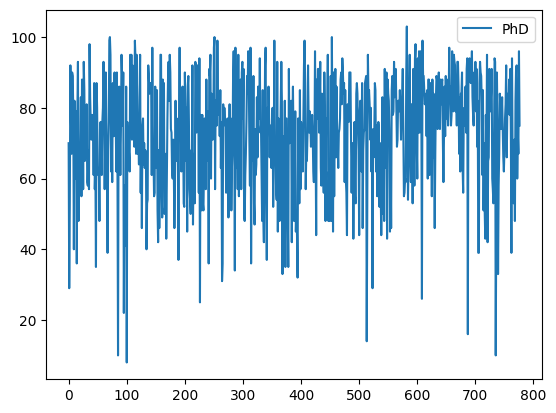

In [40]:
#1
df = data.drop(columns=["Private"])
print(df.corr(numeric_only=True))
df.plot(y='PhD')


In [41]:
#2

design = MS(df)
X = design.fit_transform(df)
y = data.Private == 'Yes'
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()
print(summarize(results))

                 coef  std err      z  P>|z|
intercept   -0.025700    1.860 -0.014  0.989
Apps        -0.000500    0.000 -2.249  0.025
Accept       0.000093    0.000  0.213  0.831
Enroll       0.001300    0.001  1.568  0.117
Top10perc    0.008500    0.028  0.297  0.766
Top25perc    0.007300    0.019  0.385  0.700
F.Undergrad -0.000400    0.000 -2.832  0.005
P.Undergrad  0.000018    0.000  0.136  0.892
Outstate     0.000700    0.000  6.207  0.000
Room.Board   0.000200    0.000  0.738  0.461
Books        0.002100    0.001  1.562  0.118
Personal    -0.000300    0.000 -1.216  0.224
PhD         -0.060300    0.027 -2.262  0.024
Terminal    -0.035900    0.026 -1.392  0.164
S.F.Ratio   -0.084600    0.061 -1.393  0.164
perc.alumni  0.047800    0.021  2.280  0.023
Expend       0.000200    0.000  1.721  0.085
Grad.Rate    0.016300    0.012  1.395  0.163


In [42]:
#3
probs = results.predict()
print(probs[:10])

[0.48741812 0.99993409 0.99800488 0.99978412 0.86555933 0.99914302
 0.99518713 0.99800404 0.99971288 0.99928854]


In [43]:
labels = np.array(['Yes']*777)
labels[probs<0.5] = "No"
print(confusion_table(labels, data.Private))
accuracy = (191+543)/777
print("the accuracy is:" , accuracy)

Truth       No  Yes
Predicted          
No         191   22
Yes         21  543
the accuracy is: 0.9446589446589446


In [44]:
#4


train_data = data.iloc[:527]
test_data = data.iloc[527:]

test_data.shape

(250, 18)

In [45]:
X_train, X_test = X.iloc[:527], X.iloc[527:]
y_train, y_test = y.iloc[:527], y.iloc[527:]
glm_train = sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial())
results = glm_train.fit()
print(results.summary())
#probs = results.predict(exog=X_test)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Private   No. Observations:                  527
Model:                            GLM   Df Residuals:                      509
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -58.004
Date:                Fri, 27 Sep 2024   Deviance:                       116.01
Time:                        19:06:57   Pearson chi2:                     290.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5231
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       2.9146      2.672      1.091      

In [46]:
probs = results.predict(exog=X_test)

print(probs.head(10))
labels = np.array(['Yes']*250)
labels[probs<0.5] = "No"
print(confusion_table(labels, test_data.Private))
accuracy = (96+131)/250
print("the accuracy is:" , accuracy)

527    0.999992
528    1.000000
529    0.233441
530    0.033474
531    0.147994
532    0.994145
533    0.009885
534    0.998024
535    0.934872
536    0.011573
dtype: float64
Truth      No  Yes
Predicted         
No         96    5
Yes        18  131
the accuracy is: 0.908
